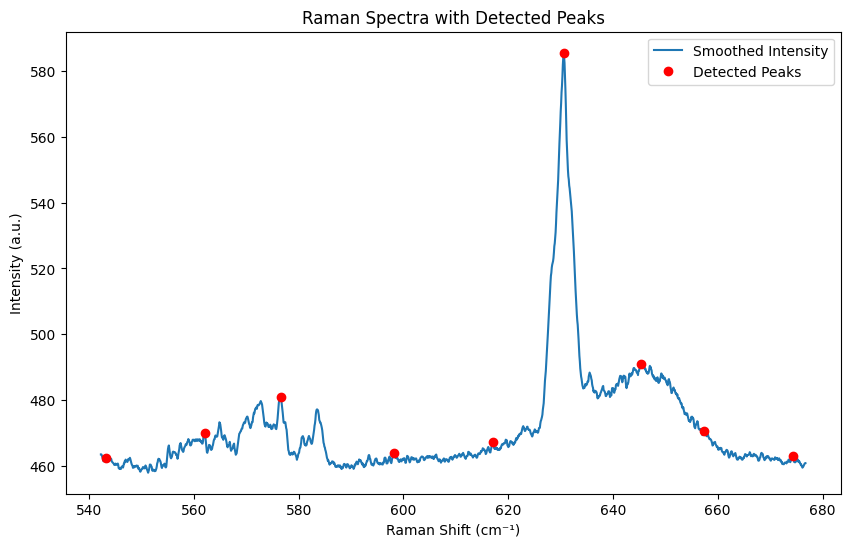

Detected peaks at Raman shifts (cm⁻¹): [543.156 562.071 576.63  598.174 617.014 630.589 645.261 657.47  674.322]
Peak heights: [462.58088578 470.0013986  480.83263403 463.98275058 467.21911422
 585.47132867 491.09417249 470.78088578 463.15617716]


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, savgol_filter

# Load the Raman spectra data from a DataFrame (example data)
# Assuming the first column is Raman shift and the rest are spectral lines
df = pd.read_csv('./csv_data/combined_spectra.csv')

# Extract Raman shift (x-axis) and intensity (y-axis) from the DataFrame
raman_shift = df.iloc[:, 0]  # First column for Raman shift
intensity = df.iloc[:, 1]    # Second column for one spectral line; adjust this for other columns

# Optional: Smooth the intensity data using Savitzky-Golay filter
smooth_intensity = savgol_filter(intensity, window_length=11, polyorder=3)

# Detect peaks in the intensity data
# 'height' and 'distance' parameters can be adjusted based on the noise level and resolution of the data
peaks, properties = find_peaks(smooth_intensity, height=75, distance=150)

# Plot the spectrum with detected peaks
plt.figure(figsize=(10, 6))
plt.plot(raman_shift, smooth_intensity, label='Smoothed Intensity')
plt.plot(raman_shift[peaks], smooth_intensity[peaks], 'ro', label='Detected Peaks')
plt.xlabel('Raman Shift (cm⁻¹)')
plt.ylabel('Intensity (a.u.)')
plt.title('Raman Spectra with Detected Peaks')
plt.legend()
plt.show()

# Print peak locations and their properties
print("Detected peaks at Raman shifts (cm⁻¹):", raman_shift.iloc[peaks].values)
print("Peak heights:", properties['peak_heights'])
